# Measures of center
### - The mean is the sum of all the data points divided by the total number of data points
### - The median is the middle value of the dataset where 50% of the data is less than the median, and 50% of the data is greater than the median

The *food_consumption* dataset contains information about the kilograms of food consumed per person per year in each country in each food category (consumption) as well as information about the carbon footprint of that food category (co2_emissions) measured in kilograms of carbon dioxide, or CO2, per person per year in each country.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# compute measures of center to compare food consumption in the US and Belgium
food_consumption = pd.read_csv("food_consumption.csv")
be_consumption = food_consumption[food_consumption["country"] == "Belgium"]
usa_consumption = food_consumption[food_consumption["country"] == "USA"]

In [4]:
# Calculate mean and median consumption in Belgium
print("MEAN: ", np.mean(be_consumption['consumption']))
print("MEDIAN: ", np.median(be_consumption['consumption']))

MEAN:  42.13272727272727
MEDIAN:  12.59


In [5]:
# Calculate mean and median consumption in USA
print("MEAN :", np.mean(usa_consumption['consumption']))
print("MEDIAN :", np.median(usa_consumption['consumption']))

MEAN : 44.650000000000006
MEDIAN : 14.58


### When you want to compare summary statistics between groups, it's much easier to use .groupby() and .agg() instead of subsetting and calling the same functions multiple times.

In [6]:
# Subset for Belgium and USA only
be_and_usa = food_consumption[(food_consumption["country"] == "Belgium") | (food_consumption["country"] == "USA")]

In [7]:
# Group by country, select consumption column, and compute mean and median
be_and_usa.groupby(["country"])['consumption'].agg([np.mean, np.median])

,mean,median
country,,
Belgium,42.132727,12.59
USA,44.650000,14.58


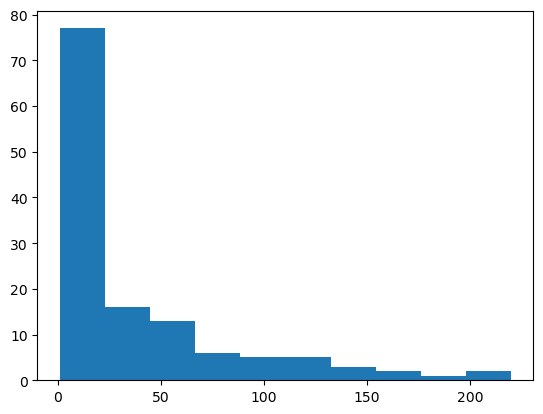

In [9]:
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Histogram of co2_emission for rice and show plot
plt.hist(rice_consumption['co2_emission'])
plt.show()

In [10]:
# Calculate mean and median of co2_emission 
rice_consumption["co2_emission"].agg([np.mean, np.median])

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64

**________________________________________________________________________________________________________________**
## Quantiles are cut points dividing the observations in a sample with equal parts. 

### There is one fewer quantile than the number of groups created. Common quantiles have special names, such as:
- quartiles (four groups), 
- deciles (ten groups)
- and percentiles (100 groups)

In [4]:
# Calculate the quartiles of the co2_emission column of food_consumption
np.quantile(food_consumption["co2_emission"], [0, 0.25, 0.5, 0.75, 1])

array([   0.    ,    5.21  ,   16.53  ,   62.5975, 1712.    ])

### pandas.DataFrame.describe method generates descriptive statistics

In [7]:
# The same information may be found in description
# min     25%        50%     75%      max

food_consumption["co2_emission"].describe()

count    1430.000000
mean       74.383993
std       152.098566
min         0.000000
25%         5.210000
50%        16.530000
75%        62.597500
max      1712.000000
Name: co2_emission, dtype: float64

### numpy.linspace returns evenly spaced numbers over a specified interval.

```
numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
```

In [8]:
# Calculate the six quantiles that split up the data into 5 pieces (quintiles) 
# of the co2_emission column of food_consumption.

np.quantile(food_consumption["co2_emission"], np.linspace(0, 1, 6))

array([   0.   ,    3.54 ,   11.026,   25.59 ,   99.978, 1712.   ])

In [9]:
# Calculate the eleven quantiles of co2_emission that split up the data into ten pieces (deciles).

np.quantile(food_consumption["co2_emission"], np.linspace(0, 1, 11))

array([0.00000e+00, 6.68000e-01, 3.54000e+00, 7.04000e+00, 1.10260e+01,
       1.65300e+01, 2.55900e+01, 4.42710e+01, 9.99780e+01, 2.03629e+02,
       1.71200e+03])

**________________________________________________________________________________________________________________**
# Variance 
### - is a measure of dispersion, meaning it is a measure of how far a set of numbers is spread out from their average value. 

# The standard deviation 
### - is a measure of the amount of dispersion of a set of values. A low standard deviation indicates that the values tend to be close to the mean (also called the expected value) of the set, while a high standard deviation indicates that the values are spread out over a wider range.

In [10]:
# Calculate the variance and standard deviation of co2_emission for each food_category by grouping and aggregating.

food_consumption.groupby("food_category")["co2_emission"].agg([np.var, np.std])

,var,std
food_category,,
beef,88748.408132,297.906710
dairy,17671.891985,132.935669
eggs,21.371819,4.622966
fish,921.637349,30.358481
lamb_goat,16475.518363,128.356996
nuts,35.639652,5.969895
pork,3094.963537,55.632396
poultry,245.026801,15.653332
rice,2281.376243,47.763754


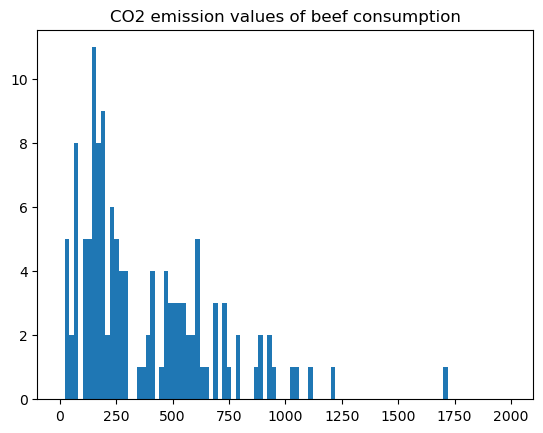

In [21]:
# Create a histogram of co2_emission for the beef food_category and show the plot.
beef_consumption = food_consumption[food_consumption["food_category"] == "beef"]
plt.hist(beef_consumption["co2_emission"], bins=100, range=(0, 2000))
plt.title("CO2 emission values of beef consumption")
plt.show()

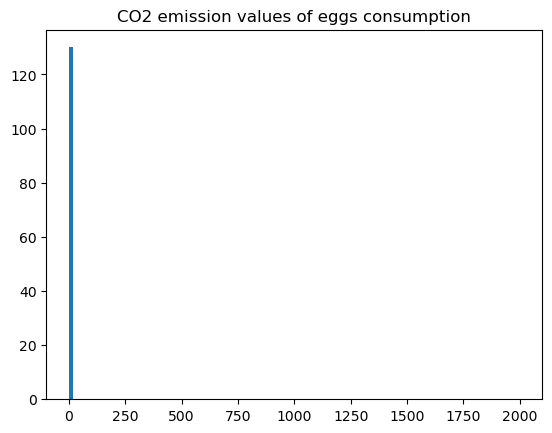

In [26]:
# Create a histogram of co2_emission for the eggs food_category and show the plot.
eggs_consumption = food_consumption[food_consumption["food_category"] == "eggs"]
plt.hist(eggs_consumption["co2_emission"], bins=100, range=(0, 2000))
plt.title("CO2 emission values of eggs consumption")
plt.show()

#  The interquartile range (IQR) 
### - is a measure of statistical dispersion. The IQR may also be called the midspread, middle 50%, fourth spread, or H‑spread. It is defined as the difference between the 75th and 25th percentiles of the data.

### - IQR is also often used to find outliers.

### Outliers can have big effects on statistics like mean, as well as statistics that rely on the mean, such as variance and standard deviation.  
### If a value is less than ```Q1 - 1.5 x IQR``` or greater than ```Q3 + 1.5 x IQR```, it's considered an outlier. In fact, this is how the lengths of the whiskers in a matplotlib box plot are calculated.

In [33]:
# Calculate the total co2_emission per country by grouping by country and taking the sum of co2_emission. 
# Store the resulting DataFrame as emissions_by_country

emissions_by_country = food_consumption.groupby("country")["co2_emission"].sum()
print(emissions_by_country)

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64

In [50]:
# Compute the first and third quartiles of emissions_by_country and store these as q1 and q3.
q1 = np.quantile(emissions_by_country, [0.25])[0]
q3 = np.quantile(emissions_by_country, [0.75])[0]

In [51]:
# Calculate the interquartile range of emissions_by_country and store it as iqr.
iqr = q3 - q1
print(iqr)

664.4925000000001


In [52]:
# Calculate the lower and upper cutoffs for outliers, and store these as lower and upper
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

In [54]:
# Subset emissions_by_country to get countries 
# with a total emission greater than the upper cutoff or a total emission less than the lower cutoff.
emissions_by_country.shape
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64


# Calculating probabilities

In [5]:
# you need to randomly select a few of the deals from the list so that you can look at them more deeply. 
# Before you start selecting deals, you'll first figure out what the chances are of selecting certain deals.
deals = pd.read_csv("amir_deals.csv")

In [8]:
# Count the deals for each product

counts = deals["product"].value_counts()
print(counts)

Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: product, dtype: int64


In [9]:
# Calculate probability of picking a deal with each product

probabilities = counts / len(deals.index)
print(probabilities)

Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: product, dtype: float64


In [11]:
# randomly pick five deals
# make sure this is done randomly and that it can be reproduced in case you get asked how you chose the deals

# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = deals.sample(5)
print(sample_without_replacement)

     Unnamed: 0    product   client status   amount  num_users
127         128  Product B  Current    Won  2070.25          7
148         149  Product D  Current    Won  3485.48         52
77           78  Product B  Current    Won  6252.30         27
104         105  Product D  Current    Won  4110.98         39
166         167  Product C      New   Lost  3779.86         11


In [13]:
# Set random seed
np.random.seed(24)

# Sample 5 deals with replacement
sample_with_replacement = deals.sample(5, replace=True)
print(sample_with_replacement)

     Unnamed: 0    product   client status   amount  num_users
162         163  Product D  Current    Won  6755.66         59
131         132  Product B  Current    Won  6872.29         25
87           88  Product C  Current    Won  3579.63          3
145         146  Product A  Current    Won  4682.94         63
145         146  Product A  Current    Won  4682.94         63
